# Letter Recognition Using SVM

**Data Understanding**

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import scale

In [12]:
df = pd.read_csv("letter-recognition.csv")
df.head(3)

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9


In [13]:
df.shape

(20000, 17)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [15]:
order = list(np.sort(df["letter"].unique()))

print(order)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [22]:
df.columns

Index(['letter', 'xbox ', 'ybox ', 'width ', 'height', 'onpix ', 'xbar ',
       'ybar ', 'x2bar', 'y2bar ', 'xybar ', 'x2ybar', 'xy2bar', 'xedge ',
       'xedgey', 'yedge ', 'yedgex'],
      dtype='object')

In [23]:
# Each column name has a space which throws an error.lets fix this problem
df.columns = ['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar',
       'ybar', 'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge',
       'xedgey', 'yedge', 'yedgex']

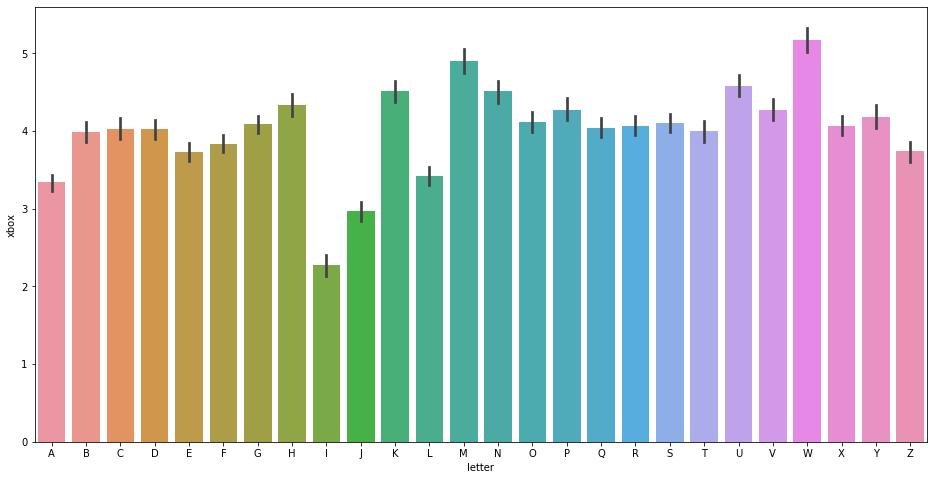

In [24]:
plt.figure(figsize = (16,8))
sns.barplot("letter","xbox",
            data = df,
            order = order)

In [27]:
df.head(2)

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10


In [28]:
df_mean = df.groupby('letter').mean()
df_mean.head(3)

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
letter,,,,,,,,,,,,,,,,
A,3.337136,6.975919,5.128010,5.178707,2.991128,8.851711,3.631179,2.755387,2.043093,7.802281,2.338403,8.465146,2.771863,6.321926,2.875792,7.468948
B,3.985640,6.962141,5.088773,5.169713,4.596606,7.671018,7.062663,5.366841,5.571802,7.954308,5.506527,6.652742,3.117493,7.919060,6.612272,9.100522
C,4.031250,7.063859,4.701087,5.296196,2.775815,5.437500,7.627717,5.927989,7.177989,8.773098,7.494565,11.947011,1.991848,8.876359,4.080163,8.555707


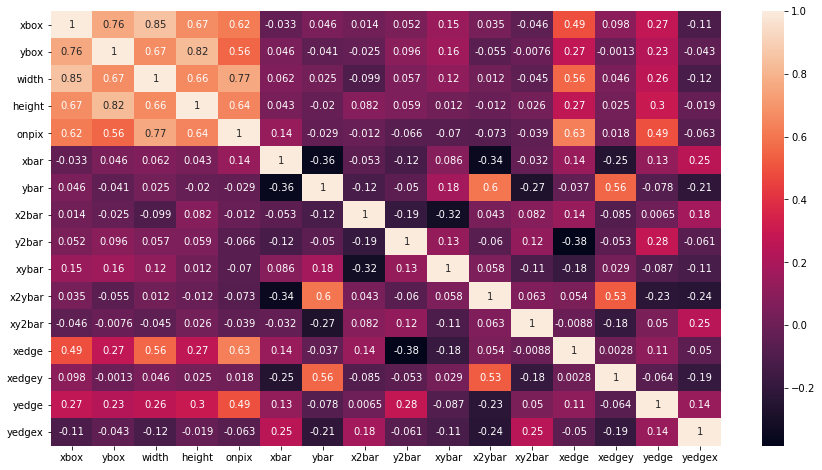

In [31]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot = True)

# Data Preparation

* Lets conduct some data preparation step before modeling.Lets chcek if it is important to rescale the feature. 

In [32]:
#average feature values

round(df.drop("letter",axis = 1).mean(),2)

xbox      4.02
ybox      7.04
width     5.12
height    5.37
onpix     3.51
xbar      6.90
ybar      7.50
x2bar     4.63
y2bar     5.18
xybar     8.28
x2ybar    6.45
xy2bar    7.93
xedge     3.05
xedgey    8.34
yedge     3.69
yedgex    7.80
dtype: float64

**In this case, the average value doesn't vary to much.Nevertheless it is better to rescale the features.*** 

In [33]:
#split the data

X = df.drop(["letter"],axis = 1)
y = df["letter"]

In [34]:
#scaling the features
X_scale = scale(X)

In [35]:
#spliting the data into train and test set
X_train,X_test,y_train,y_test = train_test_split(X_scale,y ,test_size = 0.30,random_state = 12)

# Model Building

* Lets build two models Linear and Non linear with Hyperparameter and comapre the accuracy. 

In [38]:
#Linear model
linear_model = SVC(kernel = "linear")

#fit the data
linear_model.fit(X_train,y_train)

#predict
y_pred = linear_model.predict(X_test)

In [41]:
print(f"Linear model accuracy :{linear_model.score(X_test,y_test)*100:.2f}%")

Linear model accuracy :85.75%


In [44]:
confusion_matrix(y_test,y_pred)

array([[215,   0,   0,   1,   0,   0,   0,   0,   0,   1,   1,   0,   1,
          0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 213,   0,   4,   1,   0,   2,   3,   2,   0,   0,   0,   0,
          0,   0,   0,   0,   6,   4,   0,   0,   1,   0,   1,   0,   0],
       [  1,   0, 194,   0,  11,   0,   4,   1,   0,   0,  15,   2,   1,
          0,   2,   0,   0,   0,   0,   0,   4,   0,   0,   0,   0,   0],
       [  1,  16,   0, 214,   0,   0,   1,   3,   0,   0,   2,   0,   0,
          3,   3,   0,   0,   3,   0,   1,   0,   0,   0,   0,   0,   0],
       [  0,   1,   1,   0, 179,   0,   9,   0,   0,   0,   1,   3,   0,
          0,   0,   0,   2,   1,   4,   4,   0,   0,   0,   1,   0,   1],
       [  0,   1,   0,   2,   0, 204,   1,   1,   1,   0,   0,   0,   0,
          2,   0,   2,   0,   0,   4,   6,   0,   0,   0,   0,   0,   1],
       [  1,   2,   8,   5,   1,   1, 176,   0,   0,   1,   3,   3,   0,
          0,   2,   1,   3,   3,   4,   0,   

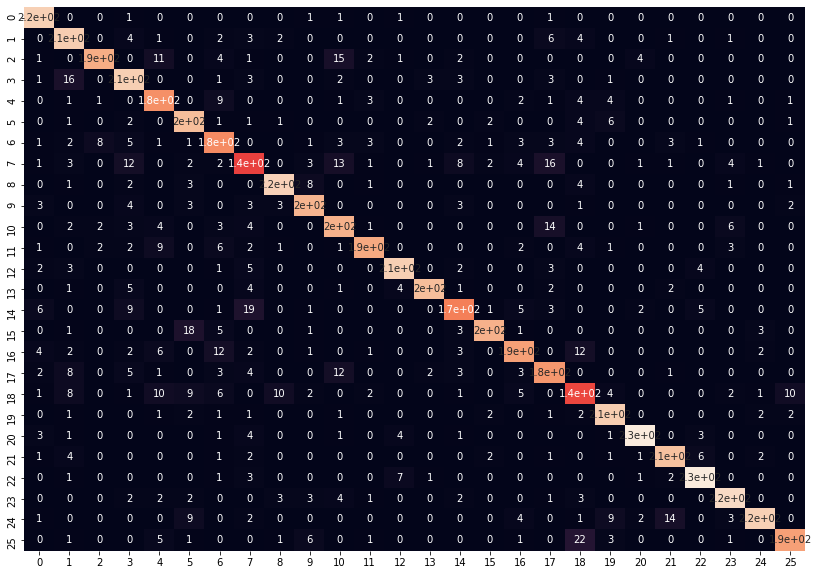

In [43]:
# Visualize the Confusion Matrix

plt.figure(figsize = (14,10))
sns.heatmap(confusion_matrix(y_test,y_pred),
            annot = True,
            cbar = False)

In [45]:
# Non linear model

non_lin_model = SVC(C = 1,kernel = "rbf")

#fit data in the non linear model
non_lin_model.fit(X_train,y_train)

#prediction
y_preds = non_lin_model.predict(X_test)

In [47]:
print(f"Non Linear model accuracy :{non_lin_model.score(X_test,y_test)*100:.2f}%")

Non Linear model accuracy :94.68%


* Its is clearly visible that the non linear model is performing better than Linear model

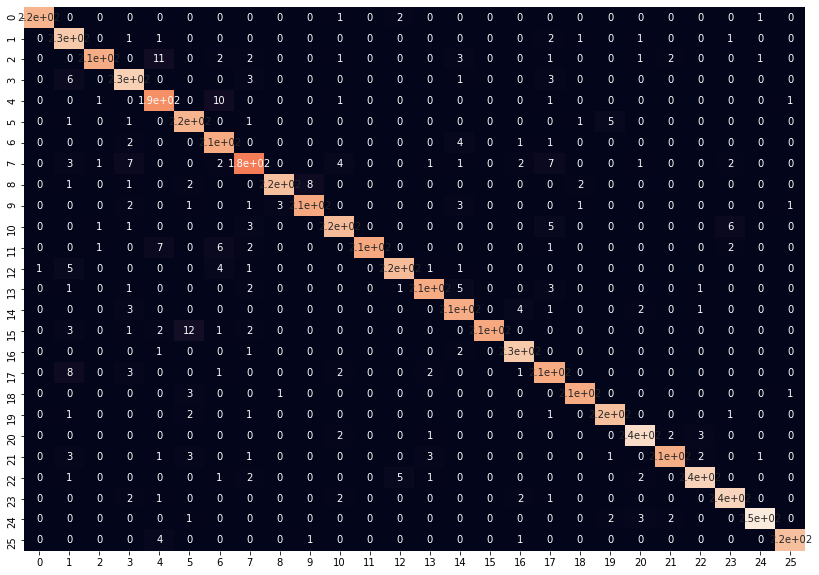

In [48]:
#Visualize the non lonear model confusion matrix

plt.figure(figsize = (14,10))
sns.heatmap(confusion_matrix(y_test,y_preds),
            annot = True,
            cbar = False)

# Hyperparameter Tuning

In [50]:
svm_grid = {"gamma":[1e-2, 1e-3, 1-4],
            "C": [1,5,10,100]}

model = SVC(kernel = "rbf")

#setup GridSearch Cv

svm_grid_cv = GridSearchCV(estimator = model,
                           param_grid = svm_grid,
                           scoring = "accuracy",
                           cv = 5,
                           verbose = 2,
                           return_train_score = True)

#fit the model

svm_grid_cv.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=1, gamma=0.01 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................. C=1, gamma=0.01, total=   4.5s
[CV] C=1, gamma=0.01 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.4s remaining:    0.0s


[CV] .................................. C=1, gamma=0.01, total=   4.5s
[CV] C=1, gamma=0.01 .................................................
[CV] .................................. C=1, gamma=0.01, total=   4.5s
[CV] C=1, gamma=0.01 .................................................
[CV] .................................. C=1, gamma=0.01, total=   4.4s
[CV] C=1, gamma=0.01 .................................................
[CV] .................................. C=1, gamma=0.01, total=   4.5s
[CV] C=1, gamma=0.001 ................................................
[CV] ................................. C=1, gamma=0.001, total=   8.2s
[CV] C=1, gamma=0.001 ................................................
[CV] ................................. C=1, gamma=0.001, total=   8.2s
[CV] C=1, gamma=0.001 ................................................
[CV] ................................. C=1, gamma=0.001, total=   8.2s
[CV] C=1, gamma=0.001 ................................................
[CV] .

C:\Users\ROBIN\.conda\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: gamma < 0

  FitFailedWarning)
C:\Users\ROBIN\.conda\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: gamma < 0

  FitFailedWarning)
C:\Users\ROBIN\.conda\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: gamma < 0

  FitFailedWarning)
C:\Users\ROBIN\.conda\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramete

[CV] .................................. C=5, gamma=0.01, total=   3.1s
[CV] C=5, gamma=0.01 .................................................
[CV] .................................. C=5, gamma=0.01, total=   3.1s
[CV] C=5, gamma=0.01 .................................................
[CV] .................................. C=5, gamma=0.01, total=   3.1s
[CV] C=5, gamma=0.01 .................................................
[CV] .................................. C=5, gamma=0.01, total=   3.1s
[CV] C=5, gamma=0.01 .................................................
[CV] .................................. C=5, gamma=0.01, total=   3.1s
[CV] C=5, gamma=0.001 ................................................
[CV] ................................. C=5, gamma=0.001, total=   5.3s
[CV] C=5, gamma=0.001 ................................................
[CV] ................................. C=5, gamma=0.001, total=   5.4s
[CV] C=5, gamma=0.001 ................................................
[CV] .

C:\Users\ROBIN\.conda\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: gamma < 0

  FitFailedWarning)
C:\Users\ROBIN\.conda\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: gamma < 0

  FitFailedWarning)
C:\Users\ROBIN\.conda\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: gamma < 0

  FitFailedWarning)
C:\Users\ROBIN\.conda\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramete

[CV] ................................. C=10, gamma=0.01, total=   2.8s
[CV] C=10, gamma=0.01 ................................................
[CV] ................................. C=10, gamma=0.01, total=   2.8s
[CV] C=10, gamma=0.01 ................................................
[CV] ................................. C=10, gamma=0.01, total=   2.8s
[CV] C=10, gamma=0.01 ................................................
[CV] ................................. C=10, gamma=0.01, total=   2.8s
[CV] C=10, gamma=0.01 ................................................
[CV] ................................. C=10, gamma=0.01, total=   2.9s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................................ C=10, gamma=0.001, total=   4.4s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................................ C=10, gamma=0.001, total=   4.7s
[CV] C=10, gamma=0.001 ...............................................
[CV] .

C:\Users\ROBIN\.conda\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: gamma < 0

  FitFailedWarning)
C:\Users\ROBIN\.conda\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: gamma < 0

  FitFailedWarning)
C:\Users\ROBIN\.conda\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: gamma < 0

  FitFailedWarning)
C:\Users\ROBIN\.conda\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramete

[CV] ................................ C=100, gamma=0.01, total=   2.9s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................................ C=100, gamma=0.01, total=   2.9s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................................ C=100, gamma=0.01, total=   2.9s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................................ C=100, gamma=0.01, total=   2.9s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................................ C=100, gamma=0.01, total=   2.9s
[CV] C=100, gamma=0.001 ..............................................
[CV] ............................... C=100, gamma=0.001, total=   3.3s
[CV] C=100, gamma=0.001 ..............................................
[CV] ............................... C=100, gamma=0.001, total=   3.3s
[CV] C=100, gamma=0.001 ..............................................
[CV] .

C:\Users\ROBIN\.conda\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: gamma < 0

  FitFailedWarning)
C:\Users\ROBIN\.conda\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: gamma < 0

  FitFailedWarning)
C:\Users\ROBIN\.conda\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: gamma < 0

  FitFailedWarning)
C:\Users\ROBIN\.conda\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramete

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10, 100], 'gamma': [0.01, 0.001, -3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=2)

In [51]:
#Cv results
cv_result = pd.DataFrame(svm_grid_cv.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.991558,0.019979,1.485915,0.010656,1,0.01,"{'C': 1, 'gamma': 0.01}",0.835357,0.824286,0.832143,...,0.833071,0.005801,5,0.845893,0.843125,0.839107,0.840000,0.840982,0.841821,0.002436
1,6.273320,0.008688,1.911574,0.011685,1,0.001,"{'C': 1, 'gamma': 0.001}",0.682500,0.681071,0.684286,...,0.681857,0.006694,8,0.687857,0.690179,0.683125,0.686339,0.688929,0.687286,0.002433
2,0.014796,0.001168,0.000000,0.000000,1,-3,"{'C': 1, 'gamma': -3}",NaN,NaN,NaN,...,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.987718,0.007693,1.111080,0.005627,5,0.01,"{'C': 5, 'gamma': 0.01}",0.890000,0.881429,0.891786,...,0.887571,0.004799,3,0.902857,0.903214,0.903661,0.904286,0.900536,0.902911,0.001280
4,3.642739,0.031883,1.692888,0.044864,5,0.001,"{'C': 5, 'gamma': 0.001}",0.784643,0.776071,0.787857,...,0.784071,0.004253,7,0.793929,0.795536,0.789554,0.787321,0.791339,0.791536,0.002948
5,0.014791,0.000400,0.000000,0.000000,5,-3,"{'C': 5, 'gamma': -3}",NaN,NaN,NaN,...,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.850725,0.014661,0.995476,0.015921,10,0.01,"{'C': 10, 'gamma': 0.01}",0.910714,0.900357,0.905000,...,0.905357,0.005768,2,0.923125,0.926161,0.925179,0.926964,0.922679,0.924821,0.001672
7,3.084186,0.122053,1.560265,0.062729,10,0.001,"{'C': 10, 'gamma': 0.001}",0.815714,0.802143,0.807500,...,0.808786,0.005372,6,0.818661,0.821429,0.815714,0.817768,0.817143,0.818143,0.001903
8,0.015999,0.001092,0.000000,0.000000,10,-3,"{'C': 10, 'gamma': -3}",NaN,NaN,NaN,...,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2.109422,0.027924,0.790184,0.013530,100,0.01,"{'C': 100, 'gamma': 0.01}",0.943929,0.945357,0.945000,...,0.944714,0.000525,1,0.976429,0.975893,0.976875,0.978036,0.977946,0.977036,0.000840


In [54]:
svm_grid_cv.best_params_

{'C': 100, 'gamma': 0.01}

In [68]:
cv_result ["param_C"] = cv_result["param_C"].astype(int)
gamma_01  = cv_result[cv_result["param_gamma"]== 0.01]

In [69]:
gamma_01

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.991558,0.019979,1.485915,0.010656,1,0.01,"{'C': 1, 'gamma': 0.01}",0.835357,0.824286,0.832143,...,0.833071,0.005801,5,0.845893,0.843125,0.839107,0.840000,0.840982,0.841821,0.002436
3,1.987718,0.007693,1.111080,0.005627,5,0.01,"{'C': 5, 'gamma': 0.01}",0.890000,0.881429,0.891786,...,0.887571,0.004799,3,0.902857,0.903214,0.903661,0.904286,0.900536,0.902911,0.001280
6,1.850725,0.014661,0.995476,0.015921,10,0.01,"{'C': 10, 'gamma': 0.01}",0.910714,0.900357,0.905000,...,0.905357,0.005768,2,0.923125,0.926161,0.925179,0.926964,0.922679,0.924821,0.001672
9,2.109422,0.027924,0.790184,0.013530,100,0.01,"{'C': 100, 'gamma': 0.01}",0.943929,0.945357,0.945000,...,0.944714,0.000525,1,0.976429,0.975893,0.976875,0.978036,0.977946,0.977036,0.000840


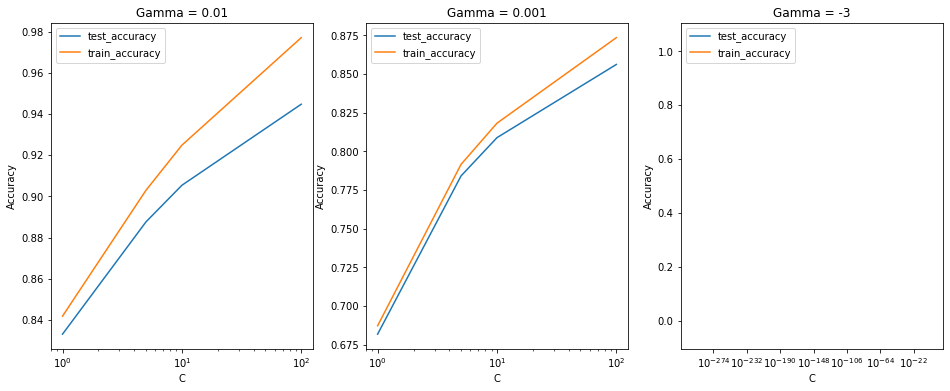

In [65]:
# converting C to numeric type for plotting on X axis
cv_result ["param_C"] = cv_result["param_C"].astype(int)

#plotting

plt.figure(figsize = (16,6))

#subplot 1/3
plt.subplot(131)

gamma_01 = cv_result[cv_result["param_gamma"]==0.01]

plt.plot(gamma_01["param_C"],gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"],gamma_01["mean_train_score"])
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("Gamma = 0.01")
plt.legend(["test_accuracy","train_accuracy"],loc = "upper left")
plt.xscale("log")

plt.subplot(132)

gamma_001 = cv_result[cv_result["param_gamma"]==0.001]
plt.plot(gamma_001["param_C"],gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"],gamma_001["mean_train_score"])
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("Gamma = 0.001")
plt.legend(["test_accuracy","train_accuracy"],loc = "upper left")
plt.xscale("log")

plt.subplot(133)

gamma_0001 = cv_result[cv_result["param_gamma"] == -3]
plt.plot(gamma_0001["param_C"],gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"],gamma_0001["mean_train_score"])
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("Gamma = -3")
plt.legend(["test_accuracy","train_accuracy"],loc = "upper left")
plt.xscale("log")

In [71]:
best_score = svm_grid_cv.best_score_
best_score

0.9447142857142857

In [72]:
svm_grid_cv.best_params_

{'C': 100, 'gamma': 0.01}

# Building and Evaluating final model

In [73]:
# model with optimal parameter

final_model = SVC(C = 100,gamma = 0.01,kernel = "rbf")

final_model.fit(X_train,y_train)

#prediction

y_preds = final_model.predict(X_test)

In [74]:
print(f"Final model accuracy :{final_model.score(X_test,y_test)*100:.2f}%")

Final model accuracy :95.90%


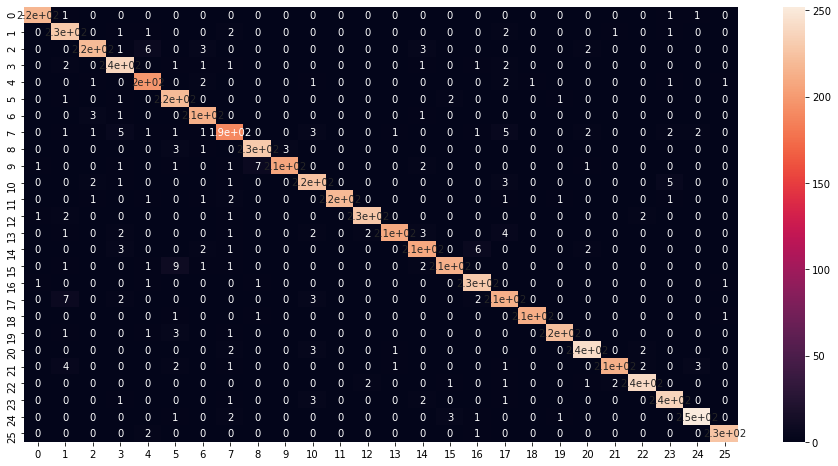

In [76]:
#Visualize the Final model Confusion Matrix

plt.figure(figsize = (16,8))
sns.heatmap(confusion_matrix(y_test,y_preds),
            annot = True,
            )